In [159]:
%pip install tensorflow

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, ReLU
import tensorflow as tf

In [161]:
dpath = 'C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/파생변수 Data set/'

# 연령별 사고율

## 20대 사고율

In [162]:
df_20 = pd.read_csv(dpath+'20대 사고율.csv')

In [163]:
df_20.shape

(84, 2)

<AxesSubplot:>

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users

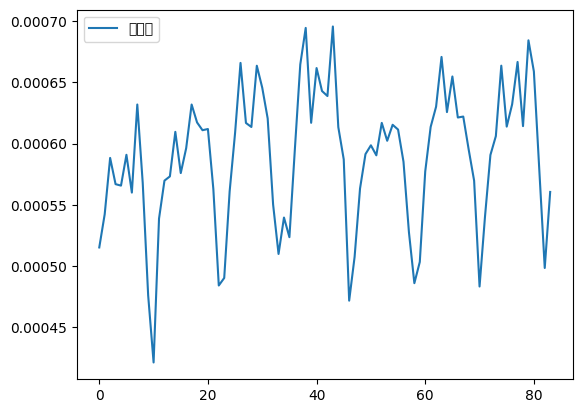

In [164]:
df_20.plot()

In [165]:
df_20 = df_20.sort_index(ascending = False)
df_20 = df_20.reset_index()
#df_20.head()

In [166]:
df_20.drop('index',axis = 1, inplace=True)
df_20.head()

시간       사고율
0  2016-01-01  0.000561
1  2016-02-01  0.000498
2  2016-03-01  0.000578
3  2016-04-01  0.000659
4  2016-05-01  0.000684

In [167]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_20['사고율'].values.reshape(-1, 1))

In [168]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 16
sequences, labels = create_sequences(data_scaled, sequence_length)

In [169]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [170]:
print(split)

54


In [171]:
# LSTM 모델 정의
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(sequence_length-1, 1)))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.add(ReLU())

c:\Program Files\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [172]:
# 모델 훈련
# EPOCH와 LEARNING RATE를 조절
epochs = 1000  # 원하는 epoch로 변경
learning_rate = 0.001  # 원하는 learning rate로 변경

# Adam optimizer를 직접 만들어서 learning rate를 설정할 수 있습니다.
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=custom_optimizer, loss='mse')

In [173]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 293ms/step - loss: 0.4573 - val_loss: 0.4029
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3754 - val_loss: 0.3575
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3249 - val_loss: 0.3150
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2970 - val_loss: 0.2691
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2523 - val_loss: 0.2194
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2056 - val_loss: 0.1659
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1585 - val_loss: 0.1088
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1136 - val_loss: 0.0529
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0685 - val_loss: 0.0120
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0476 - val_loss: 0.0084
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0646 - val_loss: 0.0186
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0850 - val_lo

In [174]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0249
Mean Squared Error on Test Data: 0.024870911613106728


In [175]:
# 12개월 예측
predictions = []
input_data = data_scaled[-15:]

for _ in range(12):
    input_sequence = input_data[-15:].reshape((1, 15, 1))
    predicted_value = model.predict(input_sequence)
    predictions.append(predicted_value[0, 0])
    
    # 예측 값을 다음 입력 데이터에 추가
    input_data = np.append(input_data, predicted_value)

# 예측 결과를 역정규화
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 12개월 예측 값 출력
print("다음 12개월의 예측 값:", predictions.flatten())

# 예측 값 평균 계산
average_prediction = np.sum(predictions)
print("1년치 사고율:", average_prediction)

# 예측 결과를 DataFrame으로 변환하여 저장
predicted_df = pd.DataFrame(data={'20대': [average_prediction]})
predicted_df.to_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
다음 12개월의 예측 값: [0.00056131 0.00052829 0.00051742 0.00052803 0.00056405 0.00059882
 0.00060464 0.00060753 0.00061548 0.00062114 0.00062393 0.00061162]
1년치 사고율: 0.0069822473


In [176]:
'''# 예측 수행
predictions = model.predict(X_test)'''

'# 예측 수행\npredictions = model.predict(X_test)'

In [177]:
'''# 역정규화
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))'''

'# 역정규화\ny_test = scaler.inverse_transform(y_test.reshape(-1, 1))\npredictions = scaler.inverse_transform(predictions.reshape(-1, 1))'

In [178]:
'''# 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()'''

"# 결과 시각화\nplt.figure(figsize=(12, 6))\nplt.plot(y_test, label='True Values')\nplt.plot(predictions, label='Predictions')\nplt.legend()\nplt.show()"

## 30대 사고율

In [179]:
df_30 = pd.read_csv(dpath+'30대 사고율.csv')

<AxesSubplot:>

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users

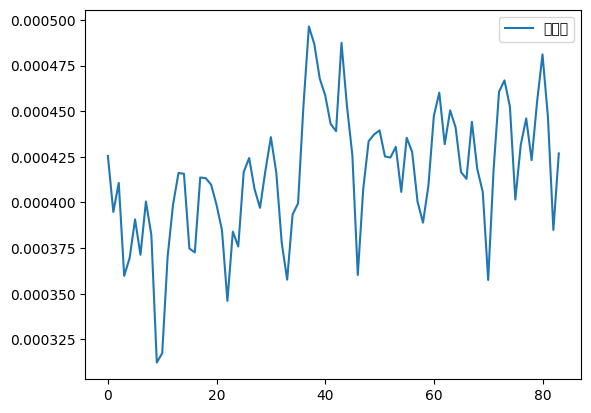

In [180]:
df_30.plot()

In [181]:
df_30 = df_30.sort_index(ascending = False)
df_30 = df_30.reset_index()
#df_20.head()

In [182]:
df_30.drop('index',axis = 1, inplace=True)
df_30.head()

시간       사고율
0  2016-01-01  0.000427
1  2016-02-01  0.000385
2  2016-03-01  0.000447
3  2016-04-01  0.000481
4  2016-05-01  0.000455

In [183]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_30['사고율'].values.reshape(-1, 1))

In [184]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 16
sequences, labels = create_sequences(data_scaled, sequence_length)

In [185]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [186]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0114 - val_loss: 0.0248
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0131 - val_loss: 0.0181
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0104 - val_loss: 0.0087
Epoch 4/1000


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0108 - val_loss: 0.0084
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0141 - val_loss: 0.0135
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0105 - val_loss: 0.0240
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0110 - val_loss: 0.0234
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0082 - val_loss: 0.0191
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0111 - val_loss: 0.0206
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0092 - val_loss: 0.0173
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0081 - val_loss: 0.0142
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0102 - val_loss: 0.0164
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0077 - val_loss: 0.0173
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0078 - val_loss: 0.0148
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0081 - val_

In [187]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1154
Mean Squared Error on Test Data: 0.11538147181272507


In [188]:
# 12개월 예측
predictions = []
input_data = data_scaled[-15:]

for _ in range(12):
    input_sequence = input_data[-15:].reshape((1, 15, 1))
    predicted_value = model.predict(input_sequence)
    predictions.append(predicted_value[0, 0])
    
    # 예측 값을 다음 입력 데이터에 추가
    input_data = np.append(input_data, predicted_value)

# 예측 결과를 역정규화
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 12개월 예측 값 출력
print("다음 12개월의 예측 값:", predictions.flatten())

# 예측 값 평균 계산
average_prediction = np.sum(predictions)
print("12개월 예측 값의 평균:", average_prediction)

# 예측 결과를 DataFrame으로 변환하여 저장
predicted_df = pd.DataFrame(data={'30대': [average_prediction]})
existing_data = pd.read_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
다음 12개월의 예측 값: [0.00043596 0.00044606 0.00045578 0.00047509 0.00049534 0.00052393
 0.00054274 0.00052209 0.00053815 0.00049573 0.00048013 0.00045549]
12개월 예측 값의 평균: 0.005866485


## 40대 사고율

In [189]:
df_40 = pd.read_csv(dpath+'40대 사고율.csv')

<AxesSubplot:>

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users

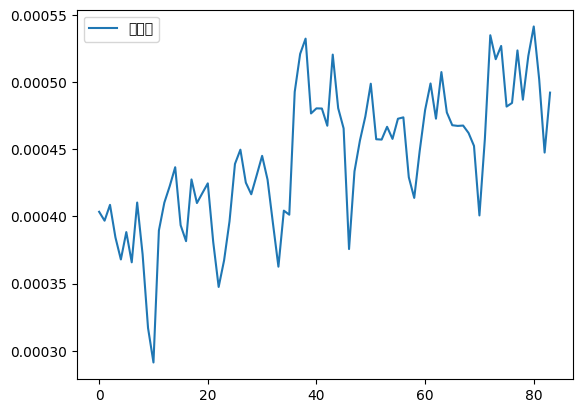

In [190]:
df_40.plot()

In [191]:
df_40 = df_40.sort_index(ascending = False)
df_40 = df_40.reset_index()

In [192]:
df_40.drop('index',axis = 1, inplace=True)
df_40.head()

시간       사고율
0  2016-01-01  0.000492
1  2016-02-01  0.000448
2  2016-03-01  0.000502
3  2016-04-01  0.000542
4  2016-05-01  0.000520

In [193]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_40['사고율'].values.reshape(-1, 1))

In [194]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 16
sequences, labels = create_sequences(data_scaled, sequence_length)

In [195]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [196]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0118 - val_loss: 0.0251
Epoch 2/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0073

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0076 - val_loss: 0.0387
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0085 - val_loss: 0.0485
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0077 - val_loss: 0.0532
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0076 - val_loss: 0.0513
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0074 - val_loss: 0.0303
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0078 - val_loss: 0.0353
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0071 - val_loss: 0.0351
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0071 - val_loss: 0.0185
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0089 - val_loss: 0.0188
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0068 - val_loss: 0.0237
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0077 - val_loss: 0.0182
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0069 - val_lo

In [197]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0874
Mean Squared Error on Test Data: 0.08742676675319672


In [198]:
# 12개월 예측
predictions = []
input_data = data_scaled[-15:]

for _ in range(12):
    input_sequence = input_data[-15:].reshape((1, 15, 1))
    predicted_value = model.predict(input_sequence)
    predictions.append(predicted_value[0, 0])
    
    # 예측 값을 다음 입력 데이터에 추가
    input_data = np.append(input_data, predicted_value)

# 예측 결과를 역정규화
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 12개월 예측 값 출력
print("다음 12개월의 예측 값:", predictions.flatten())

# 예측 값 평균 계산
average_prediction = np.sum(predictions)
print("12개월 예측 값의 평균:", average_prediction)

# 예측 결과를 DataFrame으로 변환하여 저장
predicted_df = pd.DataFrame(data={'40대': [average_prediction]})
existing_data = pd.read_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
다음 12개월의 예측 값: [0.00044296 0.00045146 0.00046008 0.00047541 0.00049356 0.00050433
 0.00051233 0.0005327  0.0005569  0.00058027 0.00060426 0.0006235 ]
12개월 예측 값의 평균: 0.0062377607


## 50대 사고율

In [199]:
df_50 = pd.read_csv(dpath+'50대 사고율.csv')

<AxesSubplot:>

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users

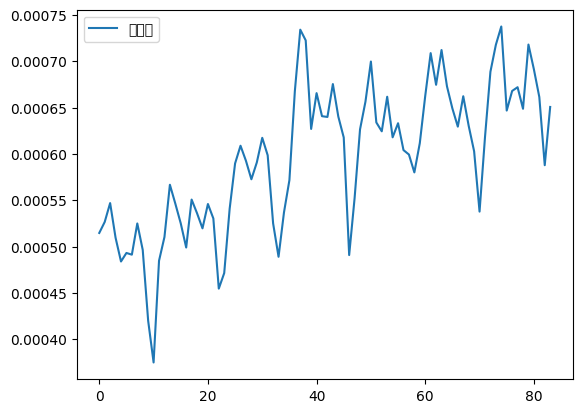

In [200]:
df_50.plot()

In [201]:
df_50 = df_50.sort_index(ascending = False)
df_50 = df_50.reset_index()
#df_20.head()

In [202]:
df_50.drop('index',axis = 1, inplace=True)
df_50.head()

시간       사고율
0  2016-01-01  0.000651
1  2016-02-01  0.000588
2  2016-03-01  0.000661
3  2016-04-01  0.000691
4  2016-05-01  0.000718

In [203]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_50['사고율'].values.reshape(-1, 1))

In [204]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 16
sequences, labels = create_sequences(data_scaled, sequence_length)

In [205]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [206]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.0075 - val_loss: 0.0801
Epoch 2/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0053

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0052 - val_loss: 0.0915
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0061 - val_loss: 0.0979
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0064 - val_loss: 0.0465
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0062 - val_loss: 0.0331
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0051 - val_loss: 0.0669
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0094 - val_loss: 0.0443
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0046 - val_loss: 0.0431
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0044 - val_loss: 0.0505
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0042 - val_loss: 0.0266
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0041 - val_loss: 0.0355
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0037 - val_loss: 0.0355
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0031 - val_lo

In [207]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0247
Mean Squared Error on Test Data: 0.024687638506293297


In [208]:
# 12개월 예측
predictions = []
input_data = data_scaled[-15:]

for _ in range(12):
    input_sequence = input_data[-15:].reshape((1, 15, 1))
    predicted_value = model.predict(input_sequence)
    predictions.append(predicted_value[0, 0])
    
    # 예측 값을 다음 입력 데이터에 추가
    input_data = np.append(input_data, predicted_value)

# 예측 결과를 역정규화
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 12개월 예측 값 출력
print("다음 12개월의 예측 값:", predictions.flatten())

# 예측 값 평균 계산
average_prediction = np.sum(predictions)
print("12개월 예측 값의 평균:", average_prediction)

# 예측 결과를 DataFrame으로 변환하여 저장
predicted_df = pd.DataFrame(data={'50대': [average_prediction]})
existing_data = pd.read_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
다음 12개월의 예측 값: [0.00042547 0.00041581 0.0004334  0.00044116 0.000455   0.00046272
 0.00044998 0.0004269  0.00043859 0.00044664 0.00043691 0.00042275]
12개월 예측 값의 평균: 0.005255331


## ~64세 사고율

In [209]:
df_64 = pd.read_csv(dpath+'~64세 사고율.csv')

<AxesSubplot:>

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users

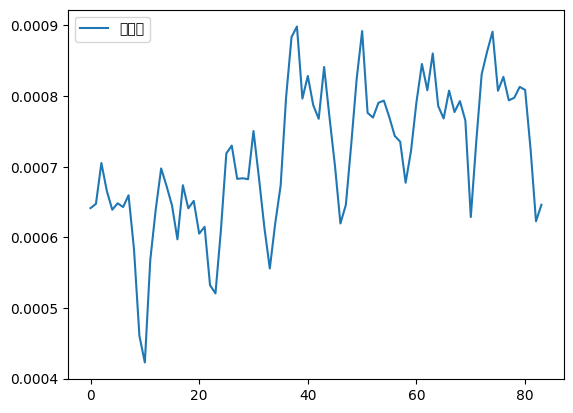

In [210]:
df_64.plot()

In [211]:
df_64 = df_64.sort_index(ascending = False)
df_64 = df_64.reset_index()
#df_20.head()

In [212]:
df_64.drop('index',axis = 1, inplace=True)
df_64.head()

시간       사고율
0  2016-01-01  0.000646
1  2016-02-01  0.000623
2  2016-03-01  0.000725
3  2016-04-01  0.000809
4  2016-05-01  0.000813

In [213]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_64['사고율'].values.reshape(-1, 1))

In [214]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 16
sequences, labels = create_sequences(data_scaled, sequence_length)

In [215]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [216]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0049 - val_loss: 0.0326
Epoch 2/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0045

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0046 - val_loss: 0.0314
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0046 - val_loss: 0.0305
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0043 - val_loss: 0.0283
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0037 - val_loss: 0.0344
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0044 - val_loss: 0.0243
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0044 - val_loss: 0.0240
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0040 - val_loss: 0.0169
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035 - val_loss: 0.0132
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0053 - val_loss: 0.0127
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0045 - val_loss: 0.0130
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0034 - val_loss: 0.0143
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0051 - val_lo

In [217]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1370
Mean Squared Error on Test Data: 0.13699324429035187


In [218]:
# 12개월 예측
predictions = []
input_data = data_scaled[-15:]

for _ in range(12):
    input_sequence = input_data[-15:].reshape((1, 15, 1))
    predicted_value = model.predict(input_sequence)
    predictions.append(predicted_value[0, 0])
    
    # 예측 값을 다음 입력 데이터에 추가
    input_data = np.append(input_data, predicted_value)

# 예측 결과를 역정규화
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 12개월 예측 값 출력
print("다음 12개월의 예측 값:", predictions.flatten())

# 예측 값 평균 계산
average_prediction = np.sum(predictions)
print("12개월 예측 값의 평균:", average_prediction)

# 예측 결과를 DataFrame으로 변환하여 저장
predicted_df = pd.DataFrame(data={'~64': [average_prediction]})
existing_data = pd.read_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
다음 12개월의 예측 값: [0.00077547 0.00080332 0.00089095 0.00097145 0.00108377 0.0012347
 0.00138539 0.00163584 0.00213999 0.00299777 0.00427811 0.00574035]
12개월 예측 값의 평균: 0.023937102


## 노인 사고율

In [219]:
df_se = pd.read_csv(dpath+'노인 사고율.csv')

<AxesSubplot:>

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users

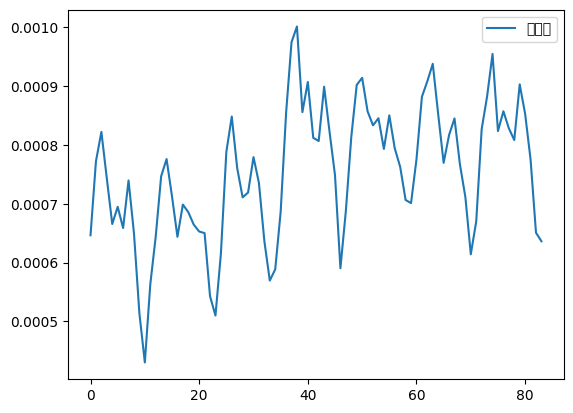

In [220]:
df_se.plot()

In [221]:
df_se = df_se.sort_index(ascending = False)
df_se = df_se.reset_index()
#df_20.head()

In [222]:
df_se.drop('index',axis = 1, inplace=True)
df_se.head()

시간       사고율
0  2016-01-01  0.000636
1  2016-02-01  0.000651
2  2016-03-01  0.000775
3  2016-04-01  0.000853
4  2016-05-01  0.000903

In [223]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_se['사고율'].values.reshape(-1, 1))

In [224]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 16
sequences, labels = create_sequences(data_scaled, sequence_length)

In [225]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [226]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0156 - val_loss: 0.1086
Epoch 2/1000


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0127 - val_loss: 0.0232
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0192 - val_loss: 0.0388
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0118 - val_loss: 0.0322
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0090 - val_loss: 0.0202
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0101 - val_loss: 0.0568
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0128 - val_loss: 0.0188
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0081 - val_loss: 0.0132
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0088 - val_loss: 0.0374
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0091 - val_loss: 0.0257
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0070 - val_loss: 0.0197
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0078 - val_loss: 0.0208
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0067 - val_lo

In [227]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0547
Mean Squared Error on Test Data: 0.05468425527215004


In [228]:
# 12개월 예측
predictions = []
input_data = data_scaled[-15:]

for _ in range(12):
    input_sequence = input_data[-15:].reshape((1, 15, 1))
    predicted_value = model.predict(input_sequence)
    predictions.append(predicted_value[0, 0])
    
    # 예측 값을 다음 입력 데이터에 추가
    input_data = np.append(input_data, predicted_value)

# 예측 결과를 역정규화
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 12개월 예측 값 출력
print("다음 12개월의 예측 값:", predictions.flatten())

# 예측 값 평균 계산
average_prediction = np.sum(predictions)
print("12개월 예측 값의 평균:", average_prediction)

# 예측 결과를 DataFrame으로 변환하여 저장
predicted_df = pd.DataFrame(data={'65~': [average_prediction]})
existing_data = pd.read_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
다음 12개월의 예측 값: [0.0006423  0.00068914 0.00070754 0.0007229  0.00074684 0.0007356
 0.00066274 0.00059035 0.00063669 0.00067712 0.00065309 0.00056374]
12개월 예측 값의 평균: 0.00802805


# 성별 사고율

## 남성 사고율

In [229]:
df_m = pd.read_csv(dpath+'남성 사고율.csv')

In [230]:
df_m.shape

(9, 2)

In [231]:
df_m = df_m.sort_index(ascending = False)
df_m = df_m.reset_index()
#df_20.head()

In [232]:
df_m.drop('index',axis = 1, inplace=True)
df_m.head()

시간       사고율
0  2014  0.041962
1  2015  0.041687
2  2016  0.040964
3  2017  0.040731
4  2018  0.043316

In [233]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_m['사고율'].values.reshape(-1, 1))

In [234]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 3
sequences, labels = create_sequences(data_scaled, sequence_length)

In [235]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [236]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1036 - val_loss: 0.9137
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1026 - val_loss: 0.9062
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1008 - val_loss: 0.8963
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0984 - val_loss: 0.8844
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0956 - val_loss: 0.8709
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0925 - val_loss: 0.8563
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0893 - val_loss: 0.8407
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0859 - val_loss: 0.8244
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0826 - val_loss: 0.8076
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0792 - val_loss: 0.7904
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0759 - val_loss: 0.7730
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0728 - val_loss:

In [237]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0110
Mean Squared Error on Test Data: 0.0109595637768507


In [238]:
# 12개월 예측
predictions = []
input_data = data_scaled[-15:]

# input_data가 길이 15가 되도록 조정
if len(input_data) < 15:
    input_data = np.pad(input_data, ((15 - len(input_data), 0), (0, 0)), mode='constant')

input_sequence = input_data.reshape((1, 15, 1))
predicted_value = model.predict(input_sequence)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

# 예측 값 출력
print("다음 값의 예측 값:", predicted_value[0, 0])

# 예측 결과를 DataFrame으로 변환하여 저장
predicted_df = pd.DataFrame(data={'남성': [predicted_value[0, 0]]})
existing_data = pd.read_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
다음 값의 예측 값: 6914.46


## 여성 사고율

In [239]:
df_w = pd.read_csv(dpath+'여성 사고율.csv')

In [240]:
df_w.shape

(9, 2)

In [241]:
df_w = df_w.sort_index(ascending = False)
df_w = df_w.reset_index()
#df_20.head()

In [242]:
df_w.drop('index',axis = 1, inplace=True)
df_w.head()

시간       사고율
0  2014  0.025056
1  2015  0.024793
2  2016  0.024581
3  2017  0.023881
4  2018  0.024210

In [243]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_w['사고율'].values.reshape(-1, 1))

In [244]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 3
sequences, labels = create_sequences(data_scaled, sequence_length)

In [245]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [246]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.2222 - val_loss: 0.8081
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2162 - val_loss: 0.7941
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2067 - val_loss: 0.7755
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1941

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1941 - val_loss: 0.7527
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1795 - val_loss: 0.7267
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1634 - val_loss: 0.6969
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1462 - val_loss: 0.6650
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1286 - val_loss: 0.6316
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1109 - val_loss: 0.5977
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0937 - val_loss: 0.5631
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0772 - val_loss: 0.5283
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0617 - val_loss: 0.4932
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0475 - val_loss: 0.4584
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0349 - val_loss: 0.4239
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0244 - val_

In [247]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3602
Mean Squared Error on Test Data: 0.36023661494255066


In [248]:
# 12개월 예측
predictions = []
input_data = data_scaled[-15:]

# input_data가 길이 15가 되도록 조정
if len(input_data) < 15:
    input_data = np.pad(input_data, ((15 - len(input_data), 0), (0, 0)), mode='constant')

input_sequence = input_data.reshape((1, 15, 1))
predicted_value = model.predict(input_sequence)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

# 예측 값 출력
print("다음 값의 예측 값:", predicted_value[0, 0])

# 예측 결과를 DataFrame으로 변환하여 저장
predicted_df = pd.DataFrame(data={'여성': [predicted_value[0, 0]]})
existing_data = pd.read_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


다음 값의 예측 값: 5139.365


# 약관별 사고율

## 특약 부부운전 사고율

In [249]:
df = pd.read_csv(dpath+'특약 부부운전 사고율.csv')

<AxesSubplot:>

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users

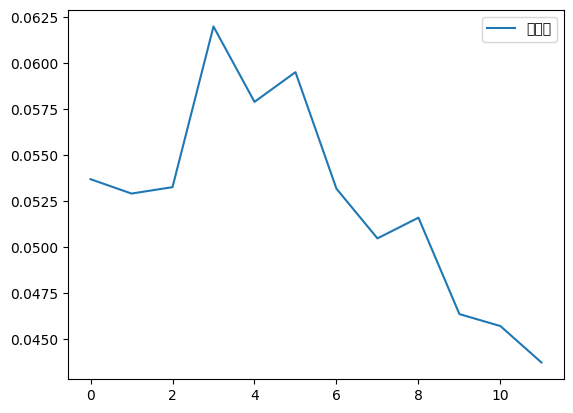

In [250]:
df.plot()

In [251]:
df.shape

(12, 2)

In [252]:
df = df.sort_index(ascending = False)
df = df.reset_index()
#df_20.head()

In [253]:
df.drop('index',axis = 1, inplace=True)
df.head()

시간       사고율
0  2011-01-01  0.043751
1  2012-01-01  0.045726
2  2013-01-01  0.046374
3  2014-01-01  0.051606
4  2015-01-01  0.050481

In [254]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['사고율'].values.reshape(-1, 1))

In [255]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 3
sequences, labels = create_sequences(data_scaled, sequence_length)

In [256]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [257]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.5812 - val_loss: 0.1350
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.4823 - val_loss: 0.1352
Epoch 3/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.3709 - val_loss: 0.1340
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2723 - val_loss: 0.1293
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1943 - val_loss: 0.1202
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1400 - val_loss: 0.1078
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1056 - val_loss: 0.0923
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0829 - val_loss: 0.0743
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0699 - val_loss: 0.0540
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0646 - val_loss: 0.0339
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0589 - val_loss: 0.0163
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0531 - val_loss: 0.0040
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0473 - val_loss: 6.4499e-05
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0426 - v

In [258]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1273
Mean Squared Error on Test Data: 0.1273147463798523


In [259]:
# 12개월 예측
predictions = []
input_data = data_scaled[-15:]

# input_data가 길이 15가 되도록 조정
if len(input_data) < 15:
    input_data = np.pad(input_data, ((15 - len(input_data), 0), (0, 0)), mode='constant')

input_sequence = input_data.reshape((1, 15, 1))
predicted_value = model.predict(input_sequence)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

# 예측 값 출력
print("다음 값의 예측 값:", predicted_value[0, 0])

# 예측 결과를 DataFrame으로 변환하여 저장
predicted_df = pd.DataFrame(data={'특약부부': [predicted_value[0, 0]]})
existing_data = pd.read_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
다음 값의 예측 값: 0.043750722


## 특약 미가입 사고율

In [260]:
df = pd.read_csv(dpath+'특약 미가입 사고율.csv')

<AxesSubplot:>

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users

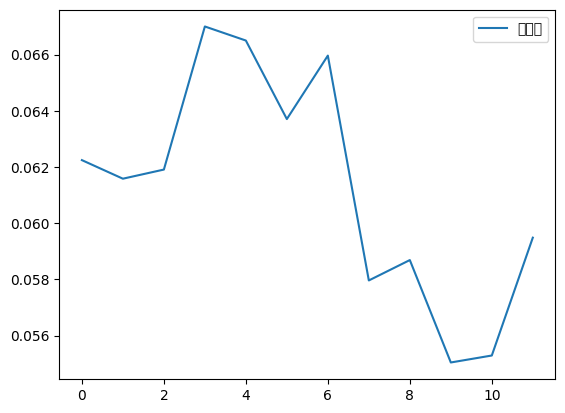

In [261]:
df.plot()

In [262]:
df.shape

(12, 2)

In [263]:
df = df.sort_index(ascending = False)
df = df.reset_index()
#df_20.head()

In [264]:
df.drop('index',axis = 1, inplace=True)
df.head()

시간       사고율
0  2011-01-01  0.059485
1  2012-01-01  0.055291
2  2013-01-01  0.055043
3  2014-01-01  0.058688
4  2015-01-01  0.057963

In [265]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['사고율'].values.reshape(-1, 1))

In [266]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 3
sequences, labels = create_sequences(data_scaled, sequence_length)

In [267]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [268]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.2021 - val_loss: 0.1311
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1807 - val_loss: 0.0518
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1553

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1553 - val_loss: 0.0061
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1323 - val_loss: 2.1697e-04
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1180 - val_loss: 0.0085
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1095 - val_loss: 0.0205
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0997 - val_loss: 0.0274
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0861 - val_loss: 0.0266
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0699 - val_loss: 0.0190
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0560 - val_loss: 0.0105
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0466 - val_loss: 0.0045
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0415 - val_loss: 0.0025
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0407 - val_loss: 0.0023
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0408 - v

In [269]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5590
Mean Squared Error on Test Data: 0.5589582324028015


In [270]:
# 12개월 예측
predictions = []
input_data = data_scaled[-15:]

# input_data가 길이 15가 되도록 조정
if len(input_data) < 15:
    input_data = np.pad(input_data, ((15 - len(input_data), 0), (0, 0)), mode='constant')

input_sequence = input_data.reshape((1, 15, 1))
predicted_value = model.predict(input_sequence)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

# 예측 값 출력
print("다음 값의 예측 값:", predicted_value[0, 0])

# 예측 결과를 DataFrame으로 변환하여 저장
predicted_df = pd.DataFrame(data={'특약 미가입': [predicted_value[0, 0]]})
existing_data = pd.read_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
다음 값의 예측 값: 43419.523


## 특약 기타 사고율

In [271]:
df = pd.read_csv(dpath+'특약 기타 사고율.csv')

<AxesSubplot:>

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users

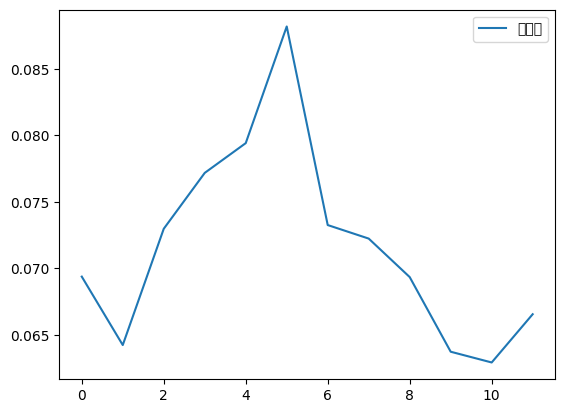

In [272]:
df.plot()

In [273]:
df.shape

(12, 2)

In [274]:
df = df.sort_index(ascending = False)
df = df.reset_index()
#df_20.head()

In [275]:
df.drop('index',axis = 1, inplace=True)
df.head()

시간       사고율
0  2011-01-01  0.066547
1  2012-01-01  0.062921
2  2013-01-01  0.063729
3  2014-01-01  0.069339
4  2015-01-01  0.072231

In [276]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['사고율'].values.reshape(-1, 1))

In [277]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 3
sequences, labels = create_sequences(data_scaled, sequence_length)

In [278]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [279]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.1847 - val_loss: 0.0549
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1053 - val_loss: 0.1989
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0868 - val_loss: 0.3184
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1018 - val_loss: 0.3184
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1153

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1153 - val_loss: 0.3184
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1113 - val_loss: 0.2895
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0921 - val_loss: 0.1683
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0691 - val_loss: 0.0651
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0535 - val_loss: 0.0099
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0517 - val_loss: 0.0012
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0578 - val_loss: 0.0159
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0636 - val_loss: 0.0267
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0633 - val_loss: 0.0238
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0576 - val_loss: 0.0134
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0507 - val_loss: 0.0045
Epoch 16/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0463 - val

In [280]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.2985
Mean Squared Error on Test Data: 1.2985366582870483


In [281]:
# 12개월 예측
predictions = []
input_data = data_scaled[-15:]

# input_data가 길이 15가 되도록 조정
if len(input_data) < 15:
    input_data = np.pad(input_data, ((15 - len(input_data), 0), (0, 0)), mode='constant')

input_sequence = input_data.reshape((1, 15, 1))
predicted_value = model.predict(input_sequence)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

# 예측 값 출력
print("다음 값의 예측 값:", predicted_value[0, 0])

# 예측 결과를 DataFrame으로 변환하여 저장
predicted_df = pd.DataFrame(data={'특약 기타': [predicted_value[0, 0]]})
existing_data = pd.read_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
다음 값의 예측 값: 119519.16


## 특약 기명피보험자1인 사고율

In [282]:
df = pd.read_csv(dpath+'특약 기명피보험자1인 사고율.csv')

<AxesSubplot:>

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users

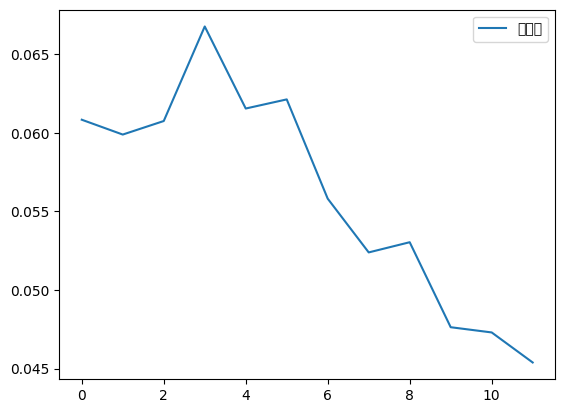

In [283]:
df.plot()

In [284]:
df.shape

(12, 2)

In [285]:
df = df.sort_index(ascending = False)
df = df.reset_index()
#df_20.head()

In [286]:
df.drop('index',axis = 1, inplace=True)
df.head()

시간       사고율
0  2011-01-01  0.045383
1  2012-01-01  0.047294
2  2013-01-01  0.047626
3  2014-01-01  0.053033
4  2015-01-01  0.052385

In [287]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['사고율'].values.reshape(-1, 1))

In [288]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 3
sequences, labels = create_sequences(data_scaled, sequence_length)

In [289]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [290]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0541 - val_loss: 1.0577
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0343 - val_loss: 0.6679
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0297

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0297 - val_loss: 0.4232
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0374 - val_loss: 0.3284
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0401 - val_loss: 0.3345
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0333 - val_loss: 0.4099
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0241 - val_loss: 0.5164
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0219 - val_loss: 0.5985
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0256 - val_loss: 0.6021
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0266 - val_loss: 0.5261
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0222 - val_loss: 0.4162
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0171 - val_loss: 0.3087
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0151 - val_loss: 0.2292
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0161 - val_l

In [291]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1080
Mean Squared Error on Test Data: 0.10801655799150467


In [292]:
# 12개월 예측
predictions = []
input_data = data_scaled[-15:]

# input_data가 길이 15가 되도록 조정
if len(input_data) < 15:
    input_data = np.pad(input_data, ((15 - len(input_data), 0), (0, 0)), mode='constant')

input_sequence = input_data.reshape((1, 15, 1))
predicted_value = model.predict(input_sequence)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

# 예측 값 출력
print("다음 값의 예측 값:", predicted_value[0, 0])

# 예측 결과를 DataFrame으로 변환하여 저장
predicted_df = pd.DataFrame(data={'특약 기명피보험자1인': [predicted_value[0, 0]]})
existing_data = pd.read_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
다음 값의 예측 값: 42703.188


## 특약 가족 사고율

In [293]:
df = pd.read_csv(dpath+'특약 가족 사고율.csv')

<AxesSubplot:>

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users

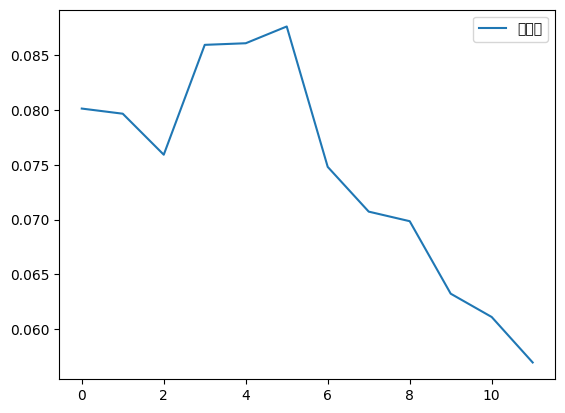

In [294]:
df.plot()

In [295]:
df.shape

(12, 2)

In [296]:
df = df.sort_index(ascending = False)
df = df.reset_index()
#df_20.head()

In [297]:
df.drop('index',axis = 1, inplace=True)
df.head()

시간       사고율
0  2011-01-01  0.056957
1  2012-01-01  0.061108
2  2013-01-01  0.063234
3  2014-01-01  0.069848
4  2015-01-01  0.070721

In [298]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['사고율'].values.reshape(-1, 1))

In [299]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 3
sequences, labels = create_sequences(data_scaled, sequence_length)

In [300]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [301]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0174 - val_loss: 0.1102
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0115 - val_loss: 0.2249
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0100 - val_loss: 0.3318
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0125 - val_loss: 0.3482
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0107 - val_loss: 0.2862
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0065 - val_loss: 0.2134
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0057 - val_loss: 0.1834
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0075 - val_loss: 0.2066
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0072 - val_loss: 0.2816
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0051 - val_loss: 0.3903
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0048 - val_loss: 0.4858
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0063 - val_loss: 0.5109
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0065 - val_loss: 0.4656
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0050 - val_l

In [302]:
# 모델 평가
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5872
Mean Squared Error on Test Data: 0.5871958136558533


In [303]:
# 12개월 예측
predictions = []
input_data = data_scaled[-15:]

# input_data가 길이 15가 되도록 조정
if len(input_data) < 15:
    input_data = np.pad(input_data, ((15 - len(input_data), 0), (0, 0)), mode='constant')

input_sequence = input_data.reshape((1, 15, 1))
predicted_value = model.predict(input_sequence)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

# 예측 값 출력
print("다음 값의 예측 값:", predicted_value[0, 0])

# 예측 결과를 DataFrame으로 변환하여 저장
predicted_df = pd.DataFrame(data={'특약 가족': [predicted_value[0, 0]]})
existing_data = pd.read_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
다음 값의 예측 값: 109898.41


# 성별 사고율 TAAS
## 남성 TAAS

In [309]:
df = pd.read_csv(dpath+'남성 사고율_TAAS.csv', encoding= 'euc-KR')

In [311]:
df

시간       사고율
0  2022  0.007602
1  2021  0.007964
2  2020  0.008412
3  2019  0.009193
4  2018  0.008933
5  2017  0.009060
6  2016  0.009413
7  2015  0.010147
8  2014  0.010008

In [313]:
df = df.sort_index(ascending = False)
df = df.reset_index()

In [314]:
df.drop('index',axis = 1, inplace=True)
df.head()

시간       사고율
0  2014  0.010008
1  2015  0.010147
2  2016  0.009413
3  2017  0.009060
4  2018  0.008933

In [326]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['사고율'].values.reshape(-1, 1))

In [327]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 3
sequences, labels = create_sequences(data_scaled, sequence_length)

In [328]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [332]:
# LSTM 모델 정의
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(sequence_length-1, 1)))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 마지막 층에 sigmoid 활성화 함수 추가

c:\Program Files\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [333]:
# 모델 컴파일 및 훈련
epochs = 1000
learning_rate = 0.001
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=custom_optimizer, loss='mse')

In [334]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0174 - val_loss: 0.0158
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0172 - val_loss: 0.0156
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0170 - val_loss: 0.0154
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0168 - val_loss: 0.0152
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0166 - val_loss: 0.0151
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0164 - val_loss: 0.0149
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0163 - val_loss: 0.0148
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0161 - val_loss: 0.0146
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0160 - val_loss: 0.0145
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0158 - val_loss: 0.0144
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0157 - val_loss: 0.0142
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0155 - val_loss:

In [335]:
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0765
Mean Squared Error on Test Data: 0.07654222100973129


In [336]:
# 다음 값 예측
input_data = data_scaled[-(sequence_length-1):]

# input_data가 길이 sequence_length-1가 되도록 조정
if len(input_data) < (sequence_length-1):
    input_data = np.pad(input_data, ((sequence_length-1 - len(input_data), 0), (0, 0)), mode='constant')

input_sequence = input_data.reshape((1, sequence_length-1, 1))
predicted_value = model.predict(input_sequence)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

# 예측 값 출력
print("다음 값의 예측 값:", predicted_value[0, 0])

# 예측 결과를 DataFrame으로 변환하여 저장
predicted_df = pd.DataFrame(data={'남성 TAAS': [predicted_value[0, 0]]})
existing_data = pd.read_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
다음 값의 예측 값: 0.008822652


## 여성 TAAS

In [337]:
df = pd.read_csv(dpath+'여성 사고율_TAAS.csv', encoding= 'euc-KR')

In [338]:
df = df.sort_index(ascending = False)
df = df.reset_index()

In [339]:
df.drop('index',axis = 1, inplace=True)
df.head()

시간       사고율
0  2014  0.003416
1  2015  0.003555
2  2016  0.003373
3  2017  0.003352
4  2018  0.003395

In [340]:
# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['사고율'].values.reshape(-1, 1))

In [341]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length, 0]
        label = data[i+sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 3
sequences, labels = create_sequences(data_scaled, sequence_length)

In [342]:
# 훈련 데이터와 테스트 데이터로 분할
split = int(0.8 * len(sequences))
train_data = sequences[:split]
test_data = sequences[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [343]:
# LSTM 모델 정의
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(sequence_length-1, 1)))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 마지막 층에 sigmoid 활성화 함수 추가

c:\Program Files\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [344]:
# 모델 컴파일 및 훈련
epochs = 1000
learning_rate = 0.001
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=custom_optimizer, loss='mse')

In [345]:
# 모델 훈련
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0172 - val_loss: 0.2490
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0170 - val_loss: 0.2498
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0167 - val_loss: 0.2506
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0165 - val_loss: 0.2513
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0163 - val_loss: 0.2520
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0161 - val_loss: 0.2526
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0159 - val_loss: 0.2533
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0158 - val_loss: 0.2538
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0156 - val_loss: 0.2543
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0154 - val_loss: 0.2548
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0153 - val_loss: 0.2552
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.015

In [346]:
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0408
Mean Squared Error on Test Data: 0.040843456983566284


In [347]:
# 다음 값 예측
input_data = data_scaled[-(sequence_length-1):]

# input_data가 길이 sequence_length-1가 되도록 조정
if len(input_data) < (sequence_length-1):
    input_data = np.pad(input_data, ((sequence_length-1 - len(input_data), 0), (0, 0)), mode='constant')

input_sequence = input_data.reshape((1, sequence_length-1, 1))
predicted_value = model.predict(input_sequence)

# 예측 결과를 역정규화
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))

# 예측 값 출력
print("다음 값의 예측 값:", predicted_value[0, 0])

# 예측 결과를 DataFrame으로 변환하여 저장
predicted_df = pd.DataFrame(data={'여성 TAAS': [predicted_value[0, 0]]})
existing_data = pd.read_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv')
result_df = pd.concat([existing_data, predicted_df], axis=1)
result_df.to_csv('C:/Users/USER/삼성화재/git_share/hyper-personalized_car_accident_prediction/Dataset/predicted_result.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
다음 값의 예측 값: 0.0034221017
